In [1]:
from icecube import icetray, dataio, dataclasses, simclasses

import numpy as np
import matplotlib as mpl
from matplotlib.colors import LogNorm, Normalize
import matplotlib.pyplot as plt
import timeit as time
from datetime import datetime

In [21]:
#is there light from 1/r

fr_arr = []; mctree_arr = []
start_time = datetime.now()
for i in range(1, 3):
    pth = '/data/icecube/domeff_analysis/reco_sim_nominal/0000000-0000999/' + str(i) + '.i3.bz2' # path to i3 file
    with dataio.I3File('/data/icecube/domeff_analysis/reco_sim_nominal/0000000-0000999/'+ str(i) + '.i3.bz2') as f:
        for fr in f:
            if f.stream.id != 'P': continue
            fr_arr.append( fr )
            mctree_arr.append( fr['I3MCTree'] )
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:20.772992


In [22]:
def path_len(pos1, pos2):                                  
    return np.sqrt((pos2.x-pos1.x)**2+(pos2.y-pos1.y)**2+(pos2.z-pos1.z)**2)

def path_len_mmc(mmc_tr):                                  
    return np.sqrt((mmc_tr.xf-mmc_tr.xi)**2+(mmc_tr.yf-mmc_tr.yi)**2+(mmc_tr.zf-mmc_tr.zi)**2)

In [207]:
mmc_Ei = []; mmc_Ef = []
mmc_path = []

for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mmc_tr = fr['MMCTrackList'][i]                              
    
        mmc_Ei.append( mmc_tr.Ei / icetray.I3Units.GeV )
        mmc_Ef.append( mmc_tr.Ef / icetray.I3Units.GeV )
        mmc_path.append( path_len_mmc(mmc_tr) )

mmc_Ei = np.array(mmc_Ei); mmc_Ef = np.array(mmc_Ef)
mmc_path = np.array(mmc_path)
print(len(mmc_Ei)); print(len(mmc_Ef)); print(len(mmc_path))

4849
4849
4849


In [208]:
number_of_events = 0
#how many events are there when E(initial)/r = E(final)
for i in range(len(mmc_Ei)):
 if (mmc_Ei[i]/mmc_path[i]) == mmc_Ef[i]:
    number_of_events += 1
print(number_of_events)
#there are no events 

0


In [209]:
number_of_events = 0
#how many events are there when E(initial)/r = E(final) +-error (let error be approximately 3% of Energies value)
for i in range(len(mmc_Ei)):
 if ((mmc_Ei[i]/mmc_path[i]) <= mmc_Ef[i]+100) & ((mmc_Ei[i]/mmc_path[i]) >= mmc_Ef[i]-100):
    number_of_events += 1
print(number_of_events)


474


In [210]:
#At muon energies >∼ 500 GeV, radiative energy losses dominate over continuous energy loss due to ionization.
#Consider energies only <500GeV
mmc_Elost = []


for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mmc_tr = fr['MMCTrackList'][i]                              
    
        mmc_Elost.append( mmc_tr.Elost / icetray.I3Units.GeV )
        
mmc_Elost = np.array(mmc_Elost)
print(len(mmc_Elost))

4849


In [39]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['hist.bins'] = 100
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 2.5
mpl.rcParams['grid.alpha'] = 0.2

/home/users/sstesnyash/jupyter_py3-4.1.0/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


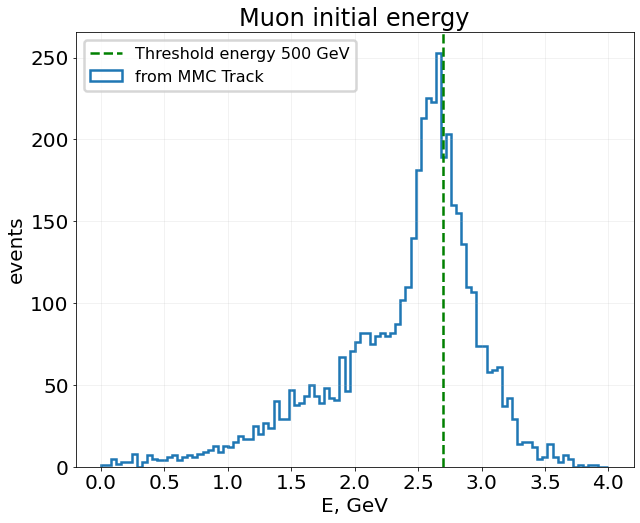

In [118]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Muon initial energy')
ax.set_ylabel('events')
ax.set_xlabel('E, GeV')
#ax.set_yscale('log')

plt.hist(np.log10(mmc_Ei), 100, range=[0.,4.], 
         histtype='step', label='from MMC Track') 

ax.axvline(np.log10(500.), c='g', linestyle='--', label='Threshold energy 500 GeV')

ax.grid()
plt.legend(loc=2,
           fontsize = 16)
plt.show()

/home/users/sstesnyash/jupyter_py3-4.1.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


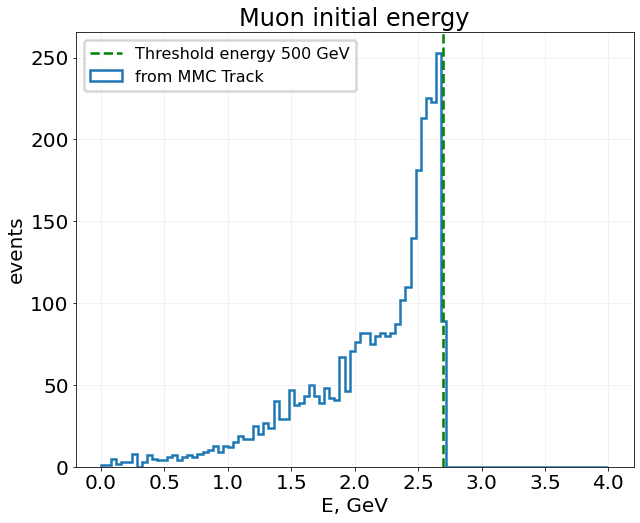

In [119]:
#cut energies more than 500GeV
en_cut = (mmc_Ei<500.)

fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Muon initial energy')
ax.set_ylabel('events')
ax.set_xlabel('E, GeV')
#ax.set_yscale('log')

plt.hist(np.log10(mmc_Ei[en_cut]), 100, range=[0.,4.], 
         histtype='step', label='from MMC Track') 

ax.axvline(np.log10(500.), c='g', linestyle='--', label='Threshold energy 500 GeV')

ax.grid()
plt.legend(loc=2,
           fontsize = 16)
plt.show()

In [191]:
stochastics = []

for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mu = fr['MMCTrackList'][i].GetI3Particle()                              
        mctree = fr['I3MCTree']
    
        daughters = mctree.get_daughters(mu)
        #print(len(daughters))
        stochastics.append( len(daughters) )
        
stochastics = np.array(stochastics)
#print(len(stochastics))
#print(len(stochastics[en_cut]))

In [190]:
len(stochastics) == len(en_cut)

True

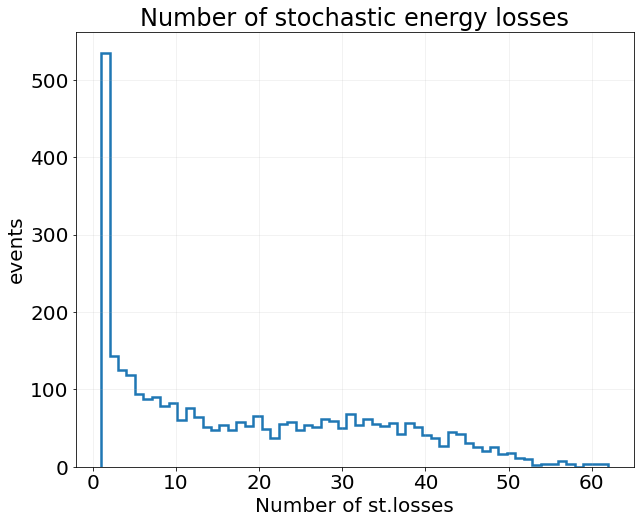

3338


In [188]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Number of stochastic energy losses')
ax.set_ylabel('events')
ax.set_xlabel('Number of st.losses')

plt.hist(stochastics[en_cut], 60, histtype='step') 

ax.grid()
plt.show()
print(len(stochastics[en_cut]))

In [192]:
#consider muons only with no stochastic losses. How many are them?
stoch_cut = (stochastics[en_cut] == 0)

In [204]:
#how many did we ended with?

print('Number of muons after energy cut (500GeV)', len(stochastics[en_cut]))
print( 'Number of muons of 0 stochastics cut', len(stochastics[en_cut][stoch_cut]))

percent = (1. - float(len(stochastics[en_cut][stoch_cut]))/float(len(stochastics[en_cut])))*100.
print(percent, '% of muons will remain if from all amount of them cut muons, those have 0 stoch. energy')

Number of muons after energy cut (500GeV) 3338
Number of muons of 0 stochastics cut 0
100.0 % of muons will remain if from all amount of them cut muons, those have 0 stoch. energy


In [174]:
#there are no muons with 0 stochastic losses


In [103]:
#consider maximum energy of stochastic losses and cut on this
max_stoch_energy = []

for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mu = fr['MMCTrackList'][i].GetI3Particle()                              
        mctree = fr['I3MCTree']
    
        daughters = mctree.get_daughters(mu)
        #if len(daughters) == 0:
         #   print(len(daughters), "Bt")
        en = []
        if len(daughters) != 0:
            for d in daughters:
                en.append(d.energy)           
            max_stoch_energy.append( max(en) )
        else: 
            max_stoch_energy.append( 0 )
        
max_stoch_energy = np.array(max_stoch_energy)
#print(len(max_stoch_energy))
#print(len(en_cut))

In [102]:
len(max_stoch_energy) == len(en_cut)

True

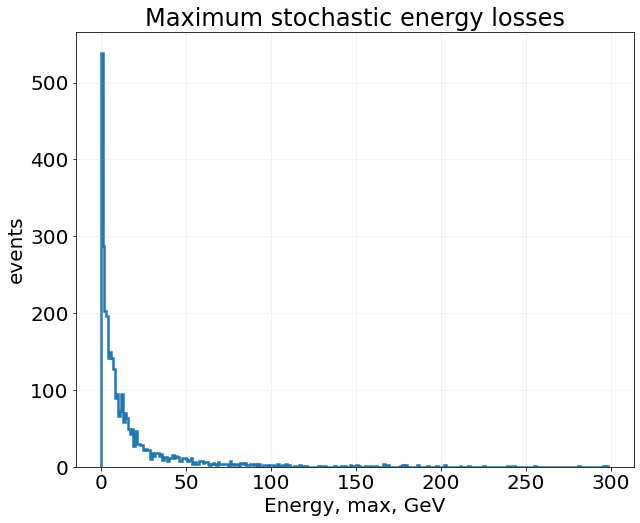

In [170]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Maximum stochastic energy losses')
ax.set_ylabel('events')
ax.set_xlabel('Energy, max, GeV')

plt.hist(max_stoch_energy[en_cut], 300, histtype='step') 

ax.grid()
plt.show()

In [205]:
max_stoch_en_cut = (max_stoch_energy[en_cut] <= 0.8)

In [206]:
print( 'Number muons after energy cut', len(max_stoch_energy[en_cut]))
print ('Number muons of max stochastic en. loss cut', len(max_stoch_energy[en_cut][max_stoch_en_cut]))

percent = (100. - 100.*float(len(max_stoch_energy[en_cut][max_stoch_en_cut]))/float(len(max_stoch_energy[en_cut])))
#print ('% of muons cut by "max stochastic en. loss cut"', percent, '%')
#print(len(max_stoch_energy[en_cut][max_sthoc_en_cut]))
#print(len(max_stoch_energy[en_cut]))
print(percent, '% of muons will remain if from all amount of them cut muons, those less than maximal stoch. energy')

Number muons after energy cut 3338
Number muons of max stochastic en. loss cut 465
86.06950269622529 % of muons will remain if from all amount of them cut muons, those less than maximal stoch. energy
